# Confidence interval

## Table of contents:
* [Maximum Likelihood logistic regression](#maxlike)
* [Bayesian logistic regression](#bayesian)
* [Non-linear logistic regression](#non-linear)
* [Dual logistic regression](#dual)
* [Relevance vector classification](#relevant-vector)
* [Incremental fitting and boosting](#boosting)
* [Classification trees](#trees)
* [Multi-class logistic regression](#multiclass)
* [Random trees, forests, and ferns](#forest)
* [Multi-class logistic regression](#multiclass)

## the meaning of 95% confidence interval 
## Law of large number
## Percentage point function
## 95% confidence interval - known true variance -
## 95% confidence interval - unknown true variance -
## $\chi^{2}$-distribution
## F-distribution
## Student-T distribution


In [ ]:
import time
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as spst
%matplotlib inline

## - the meaning of 95% confidence interval -

n_smp: number of samples sampled from a distribution<br>
n_ens: number of ensembles (containing n_smp samples) sampled from the same distribution<br>
<br>
mu_smp: population mean<br>
std_smp: population standard deviation<br>

The law of large number says mu_smp and std_smp constitutes a normal distribution in the large n_smp limit.

95% confidence interval means 0.95*n_ens ensembles contain the true mean within their 95% mass of the total mass (which is 1). If we are concerned with two-side, the interval of each ensemble defined by percentage point function for [0.025, 0.975] needs to be estimated.


# Law of large number

### Chebyshev's inequality 
Suppose $f(x)$ is a probability density function $x\in R$ and define $I = \{x: |x-\mu|\ge k\sigma\}$.

$$\begin{align}
\sigma^{2} \quad & = &\quad \int^{\infty}_{-\infty}(x-\mu)^{2}f(x)dx\\
\quad & \ge &\quad \int_{I}(x-\mu)^{2}f(x)dx\\
\quad & \ge &\quad  (k\sigma)^{2}\int_{I}f(x)dx\\
\quad & = &\quad (k\sigma)^{2}P(|x-\mu|\ge k\sigma)\\
\Rightarrow \qquad P(|x-\mu|\ge k\sigma) \quad & \le &\quad \frac{1}{k^{2}}
\end{align}$$

Suppose we sample $n$ samples from a probability distribution with mean $\mu$ and standard deviation $\sigma$.

$$\begin{align}
\bar{x}_{n} \quad & = &\quad \frac{1}{n}\sum x_{i}
\end{align}$$


The variance of the population mean is 

$$\begin{align}
\sigma_{n}^{2} \quad & = &\quad V(\bar{x}_{n}) \quad & = &\quad \frac{\sigma^{2}}{n}
\end{align}$$

We now substitute this to the Chebyshev's inequality $P(|\bar{x}_{n}-\mu|\ge k\sigma_{n}) \le \frac{1}{k^{2}}$. Introducing $\epsilon = k\sigma_{n} \Rightarrow k = \frac{\epsilon}{\sigma_{n}} = \frac{\sqrt{n}\epsilon}{\sigma}$,

$$\begin{align}
P(|\bar{x}_{n}-\mu|\ge \epsilon) \quad & \le &\quad \frac{\sigma^{2}}{n\epsilon^{2}} \quad & \rightarrow &\quad 0 \quad (n \rightarrow \infty)
\end{align}$$



# Central limit theorem

Taking Poisson distribution, let us experiment the central limit theorem.

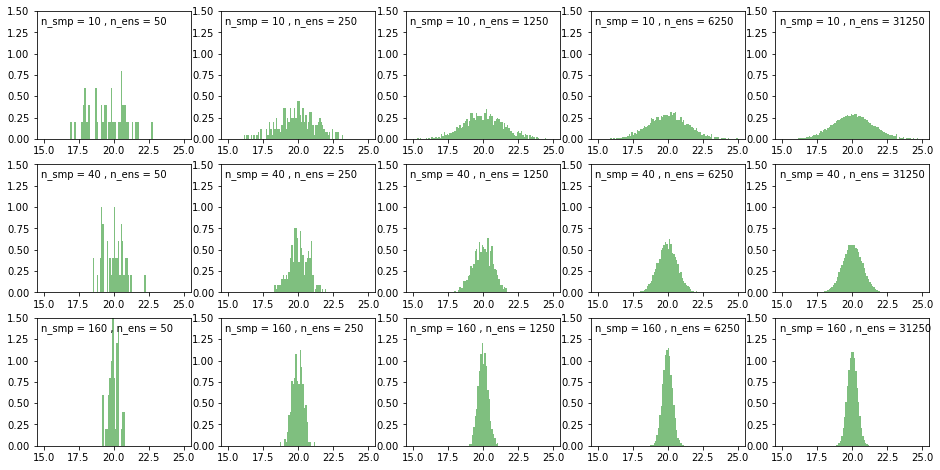

In [54]:
lmd = 20. # lambda
n_ens = [50, 250, 1250, 6250, 31250]
n_smp = [10, 40, 160]
fig = plt.figure(figsize=(16, 8))
for i in range(len(n_smp)):
    for j in range(len(n_ens)):
        s = np.random.poisson(lam=([lmd]*n_ens[j]), size=(n_smp[i], n_ens[j]))
        ss = s.mean(axis = 0)
        ax = fig.add_subplot(len(n_smp), len(n_ens), 1+j+i*len(n_ens))
        plt.hist(ss, bins=np.linspace(15, 25, 101), facecolor='g', alpha=0.5, normed=1)
        plt.ylim((0.0, 1.5))
        ax.annotate('n_smp = {} , n_ens = {}'.format(n_smp[i], n_ens[j])
                    , xy=(14.8, 1.35), xytext=(14.8, 1.35))


# Percentage point function

Let us look at percentage point function for [0.025, 0.975] which contains 95% probability mass of a normal distribution.

(-0.1, 2.0)

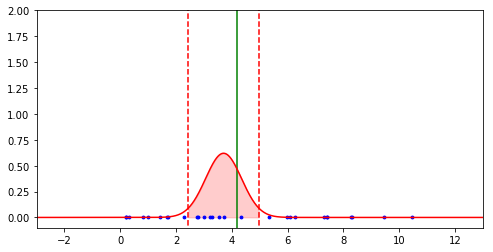

In [3]:
# generating parameters of ground truth
np.random.seed(1)
mu_tru = 10 * np.random.rand()
std_tru =  5 * np.random.rand()

# generating samples
n_smp = 30
x = np.random.normal(mu_tru, std_tru, n_smp)
mu_smp = x.mean()
std_smp = x.std() / np.sqrt(n_smp - 1)
xs = np.arange(-5, 15, 0.01)
gs_smp = spst.norm(mu_smp, std_smp).pdf(xs)

# confidence interval based on samples
ci_smp = mu_smp + std_smp * spst.norm.ppf([0.025, 0.975])
xci_smp = np.arange(ci_smp[0], ci_smp[1], 0.01)
gs_ci_smp = spst.norm(mu_smp, std_smp).pdf(xci_smp)

plt.rcParams['figure.figsize'] = (8.0,  4.0)
plt.vlines(mu_tru, -1, 4., color='g')

plt.plot(xs, gs_smp, color='r')
plt.fill_between(xci_smp, gs_ci_smp, color=(1, 0, 0), alpha=0.2)
plt.vlines(ci_smp[0], -1, 4., color='r', linestyles='dashed')
plt.vlines(ci_smp[1], -1, 4., color='r', linestyles='dashed')

plt.scatter(x, np.zeros(n_smp), s=8, c='b')
plt.xlim((-3., 13.))
plt.ylim((-0.1, 2.0))

# 95% confidence interval - known true variance -

population mean: $\bar{x} = \frac{1}{n_{smp}}\sum_{i} x_{i}$ <br>
standard error: $\frac{\sigma}{\sqrt{n_{smp}}}$. <br>
standardized parameter: $\frac{\bar{x} - \mu}{\sigma/\sqrt{n_{smp}}}$ <br>
n_iter: iterates over different np.random.seed. <br>

average: 0.95005


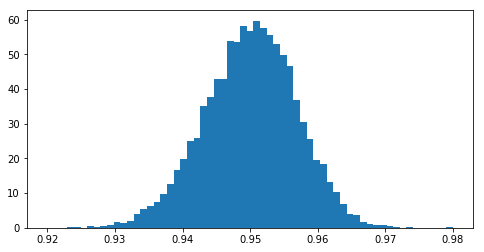

In [23]:
# generating samples
n_iter = 10000
n_smp = 100
n_ens = 1000

ratio = np.zeros(n_iter)
for seed in range(n_iter):
    np.random.seed(seed + 9821)
    mu_tru = 10 * np.random.rand()
    std_tru =  3 * np.random.rand()

    x = np.random.normal(mu_tru, std_tru, (n_ens, n_smp))
    mu_smp = x.mean(axis=1, keepdims=1)
    se_tru = std_tru / np.sqrt(n_smp)

    ci_smp = mu_smp + se_tru * spst.norm.ppf([0.025, 0.975])
    ratio[seed] = ((ci_smp[:, 0] <= mu_tru) * (ci_smp[:, 1] >= mu_tru)).mean()

plt.rcParams['figure.figsize'] = (8.0,  4.0)
plt.hist(ratio, bins=61, range=(0.92, 0.98), normed=True)
print('average: {:1.5f}'.format(ratio.mean()))

Indeed, we have verified 95% confidence interval.

# 95% confidence interval - unknown true variance -

population mean: $\bar{x} = \frac{1}{n_{smp}}\sum_{i} x_{i}$ <br>
population variance: $s = \frac{1}{n_{smp} - 1}\sum_{i}(x_{i} - \bar{x})^{2}$ <br>
standard error: $\frac{s}{\sqrt{n_{smp} - 1}}$ <br>
standardized parameter: $\frac{x - \bar{x}}{s/\sqrt{n_{smp}-1}}$ <br>
n_iter: iterates over different np.random.seed. <br>


average: 0.95009


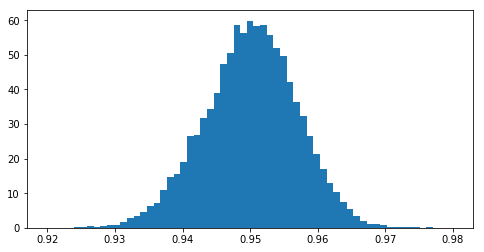

In [24]:
# generating samples
n_iter = 10000
n_smp = 100
n_ens = 1000

ratio = np.zeros(n_iter)
for seed in range(n_iter):
    np.random.seed(seed + 9821)
    mu_tru = 10 * np.random.rand()
    std_tru =  3 * np.random.rand()

    x = np.random.normal(mu_tru, std_tru, (n_ens, n_smp))
    mu_smp = x.mean(axis=1, keepdims=1)
    se_smp = x.std(axis=1, keepdims=1) / np.sqrt(n_smp - 1)

    h = spst.t.ppf((1 + 0.95) / 2, n_smp - 1)
    ci_smp = mu_smp + se_smp * np.array([-h, h])
    ratio[seed] = ((ci_smp[:, 0] <= mu_tru) * (ci_smp[:, 1] >= mu_tru)).mean()

plt.rcParams['figure.figsize'] = (8.0,  4.0)
plt.hist(ratio, bins=61, range=(0.92, 0.98), normed=True)

print('average: {:1.5f}'.format(ratio.mean()))

Indeed, we have verified 95% confidence interval.

standardized parameter <br>

$z_{i} = \frac{x_{i} - \mu}{\sigma/\sqrt{n_{smp}}}$

known true variance $\Rightarrow$ Norm($\mu$, $\frac{\sigma^{2}}{n}$)

$z = \frac{x_{i} - \bar{x}}{s/\sqrt{n_{smp}-1}}$ 

unknown true variance $\Rightarrow$ 